In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Load data

In [2]:
def load_data():
    # 500 samples for each digit from (0 - 9)
    X = np.load("Data/X.npy") 
    y = np.load("Data/y.npy")
    X = X[0:1000] # (0 - 1)
    y = y[0:1000] # (0 - 1)
    return X, y

In [3]:
X, y = load_data()
print(X.shape, y.shape)

(1000, 400) (1000, 1)


### View the variables

In [4]:
print("The first element of X is: ", X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [5]:
print("The first element of y is: ", y[0, 0])
print("The last element of y is: ", y[-1, 0])

The first element of y is:  0
The last element of y is:  1


### Visualizing the Data

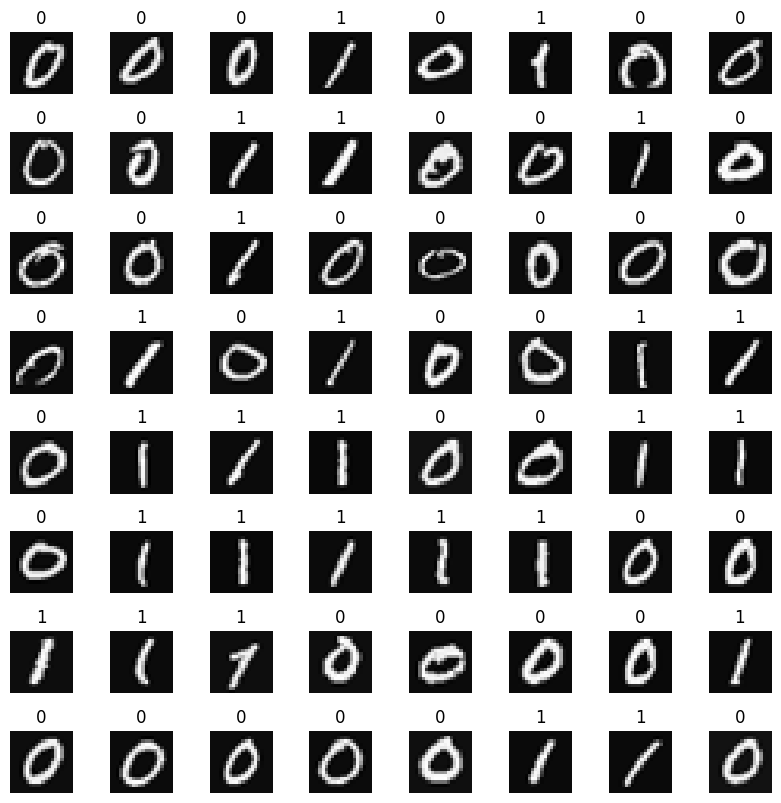

In [6]:
m, n = X.shape

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m) # random a vector of a digit

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap="gray")

    ax.set_title(y[random_index, 0])
    ax.set_axis_off()


### Model representation
The neural network you will use in this assignment is shown in the figure below.
- The neural network you will use in this assignment is shown in the figure below.
  - Recall that our inputs are pixel values of digit images.
  - Since the images are of size  20×20, this gives us 400 inputs.
- The parameters have dimensions that are sized for a neural network with **25 units in layer 1, 15 units in layer 2 and 1 output unit in layer 3**.
  - Recall that the dimensions of these parameters are determined as follows:
    - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
      - W will be of dimension $s_{in} \times s_{out}$.
      - b will a vector with $s_{out}$ elements.
  - Therefore, the shapes of W, and b, are:
    - `layer1: The shape of W1 is (400, 25) and the shape of b1 is (25,)`.
    - `layer2: The shape of W2 is (25, 15) and the shape of b2 is: (15,)`.
    - `layer3: The shape of W3 is (15, 1) and the shape of b3 is: (1,)`.

In [7]:
model = Sequential([
    tf.keras.Input(shape=(400,)), # You specify a layer's output dimensions and this determines the next layer's input dimension.
    Dense(units=25, activation="sigmoid", name="layer1"),
    Dense(units=15, activation="sigmoid", name="layer2"),
    Dense(units=1, activation="sigmoid", name="layer3")
], name="my_model")

In [8]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [10]:
[layer1, layer2, layer3] = model.layers

In [11]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [12]:
print(model.layers[2].weights)

[<Variable path=my_model/layer3/kernel, shape=(15, 1), dtype=float32, value=[[-0.22913873]
 [ 0.6042703 ]
 [ 0.03630519]
 [-0.08356553]
 [ 0.04161406]
 [-0.34445018]
 [-0.42870063]
 [-0.37244555]
 [-0.10512799]
 [-0.46873873]
 [-0.23143053]
 [-0.5043011 ]
 [-0.6024724 ]
 [ 0.25927335]
 [-0.069296  ]]>, <Variable path=my_model/layer3/bias, shape=(1,), dtype=float32, value=[0.]>]


### Train

In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    X, y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7108
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5275 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4106 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3260 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2609 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2122 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1762 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1489 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1110
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0972 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0859 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0761 
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0674 
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0600 
Epoch 

### Prediction

In [14]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
 predicting a zero: [[0.0151346]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 predicting a one:  [[0.9532012]]


In [15]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

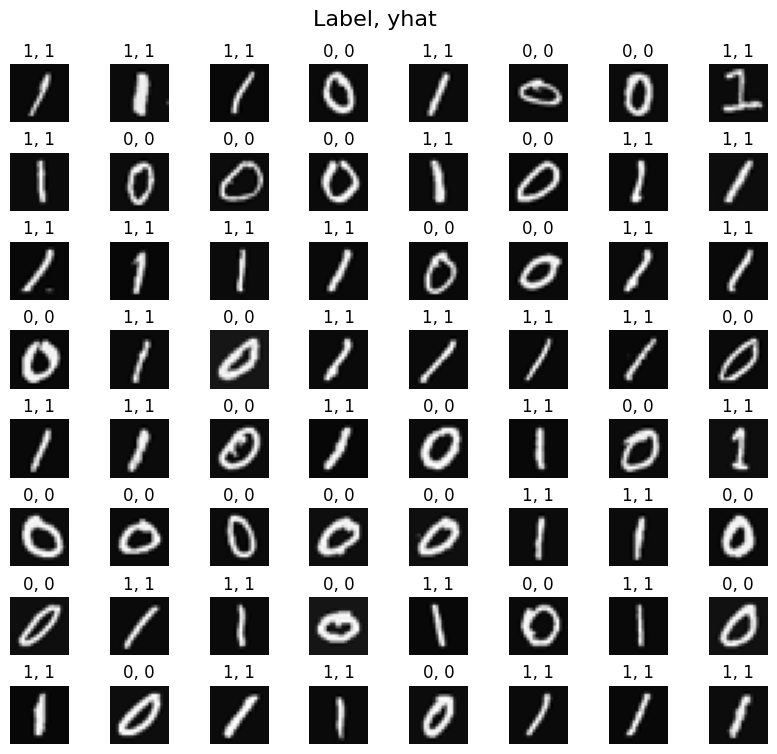

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) # [left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap="gray")

    prediction = model.predict(X[random_index].reshape(1, 400)) 
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    ax.set_title(f"{y[random_index, 0]}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [17]:
def sigmoid(z):
    f = 1 / (1 + np.exp(-z))
    return f

In [18]:
def my_dense(A_in, W, b, g):
    z = A_in @ W + b
    A_out = g(z)
    return A_out

In [19]:
def my_sequential(X, params):
    A_in = X
    for W, b in params:
        A_in = my_dense(A_in, W, b, sigmoid)
    A_out = A_in
    return A_out

In [20]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

In [21]:
params = [
    (W1, b1),
    (W2, b2),
    (W3, b3)
]

In [22]:
prediction = my_sequential(X, params)
print(prediction.shape)

(1000, 1)


In [23]:
Yhat = (prediction >= 0.5).astype(int)

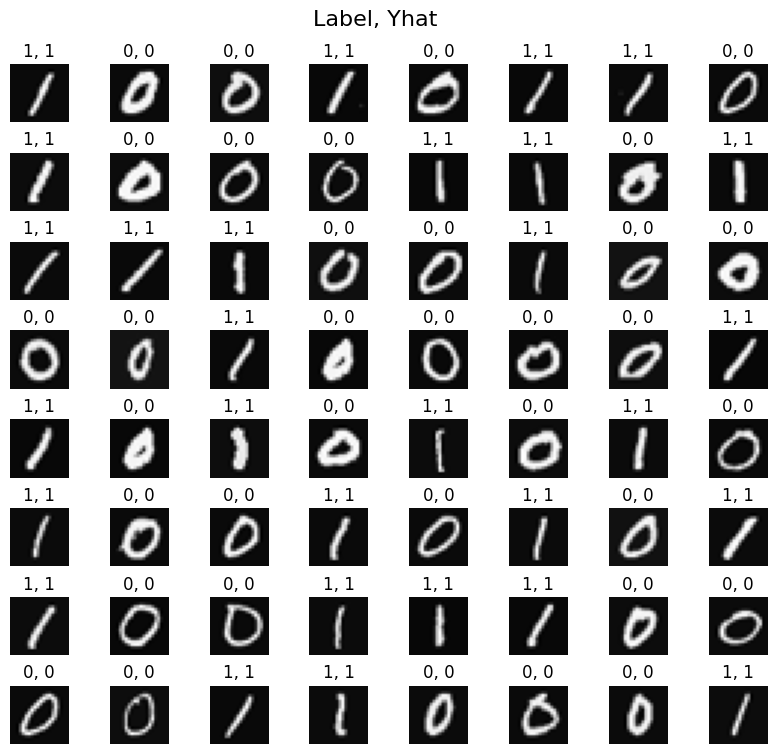

In [24]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
   
    ax.set_title(f"{y[random_index, 0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

In [ ]:
model = Sequential([
    Dense(units=25, input_shape=((400, )), activation="relu"),
    Dense(units=15, activation="relu"),
    Dense(units=1, activation="linear")
])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(X, y, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3795   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0732 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024     
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019     
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

In [ ]:
logit = model(X) # predict
f_x = tf.nn.sigmoid(logit) # convert prob

In [36]:
Yhat = (f_x.numpy() >= 0.5).astype(int)

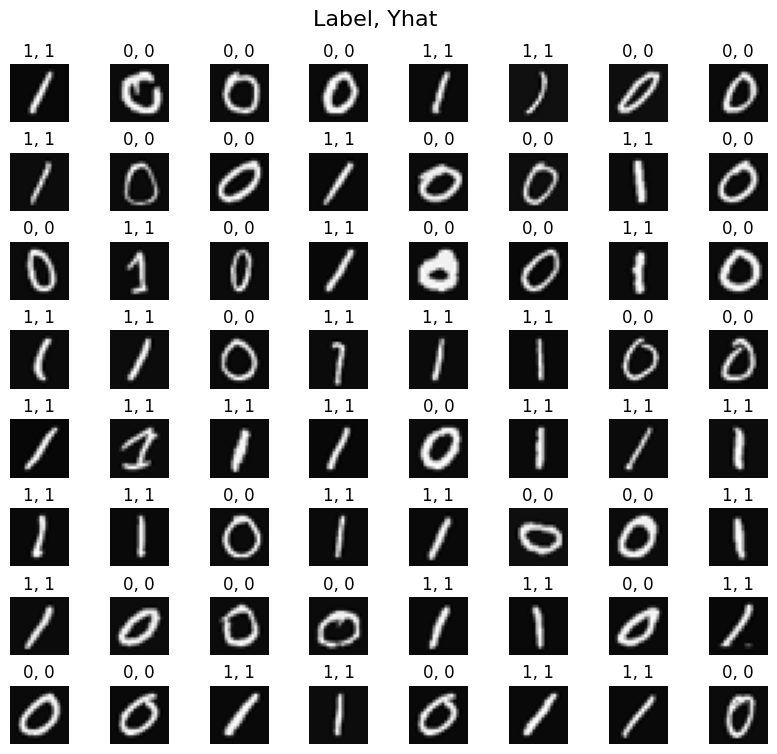

In [37]:
m, n = X.shape

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap="gray")
    ax.set_title(f"{y[random_index, 0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()